# Decompose HSC observed dual AGN

This notebook requires standard python libraries and the publicly available packages on github:
See https://github.com/dartoon/galight/blob/master/requirements.txt

This notebook has been tested with galight ==  0.2.1

For more information, please contact me: dingxuheng@126.com or dingxh@whu.edu.cn

This notebook is almost identical to the 'galight_HSC_QSO.ipynb', only that two point source are considerred.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

#Data is available at: #Data is available at: https://drive.google.com/file/d/1Axwo-aD5yFrkuHIlYBsQ8ma1nHRpcAHg/view?usp=sharing
fitsFile = pyfits.open('../example_files/HSC/dual_QSO/141637.44+003352.2_HSC-I.fits')

#Load the fov image data:
fov_image = fitsFile[1].data # check the back grounp

#Derive the header informaion, might be used to obtain the pixel scale and the exposure time.
header = fitsFile[1].header # if target position is add in WCS, the header should have the wcs information, i.e. header['EXPTIME']

#Derive the fov noise level map:
err_data= fitsFile[3].data ** 0.5

#Calculate the zeropoint for HSC filters:
file_header0 = fitsFile[0].header
FLUXMAG0 = file_header0['FLUXMAG0']
zp =  2.5 * np.log10(FLUXMAG0)   # This is something Xuheng can't make sure.

#Load the PSF data:
PSF = pyfits.getdata('../example_files/HSC/dual_QSO/141637.44+003352.2_HSC-I_psf.fits')

Estimating the background light ... ... ...


Deblending: 100%|████████████████████████████████| 5/5 [00:00<00:00, 515.98it/s]


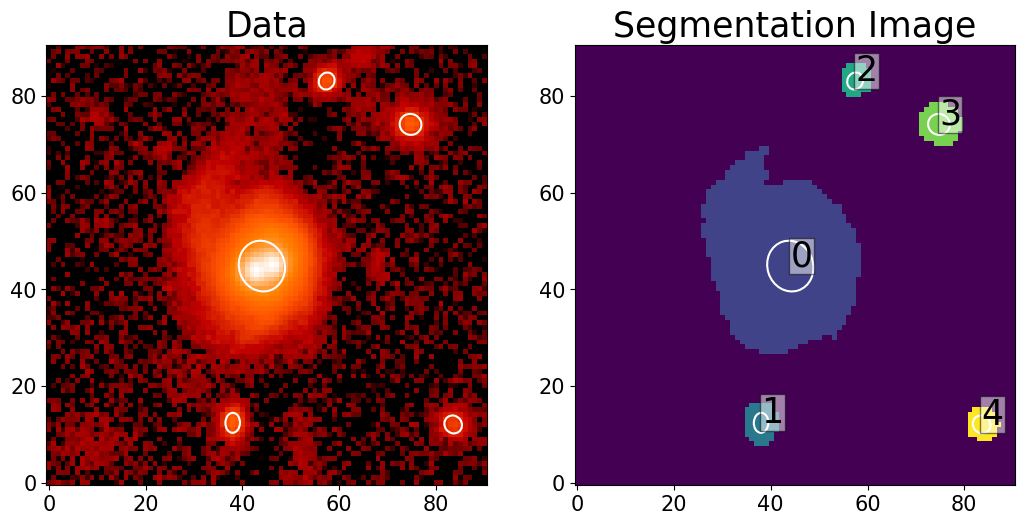

Input directly the a obj that used to create MASK, use space between each id:
 1 3


The negative PSF values are corrected as 0 values.
The data_process is ready to go to pass to FittingSpecify!


In [2]:
from galight.data_process import DataProcess
image_RA = 214.156021
image_DEC = 0.564521
data_process = DataProcess(fov_image = fov_image, fov_noise_map = err_data, target_pos = [image_RA, image_DEC],
                           pos_type = 'wcs', header = header,
                          rm_bkglight = True, if_plot=False, zp = zp)

#Generate the fitting materials
data_process.generate_target_materials(radius=45, create_mask = True, nsigma=2.8,
                                      exp_sz= 1.2, npixels = 15, if_plot=False)

#Manually input the PSF:
data_process.PSF_list = [PSF]

#Check if all the materials is given, if so to pass to the next step.
data_process.checkout() #Check if all the materials is known.

The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


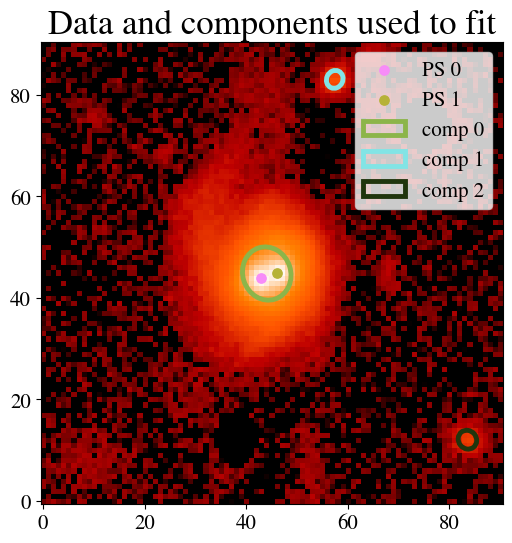

In [3]:
#%%Start to produce the class and params for lens fitting.
from galight.fitting_specify import FittingSpecify
fit_sepc = FittingSpecify(data_process)
fit_sepc.prepare_fitting_seq(point_source_num = 2) #point_source_num =2 for dual AGN.

#Plot the initial settings for fittings. 
fit_sepc.plot_fitting_sets()

fit_sepc.build_fitting_seq()

Computing the PSO ...
10
20
30
40
50
Max iteration reached! Stopping.
-3.4602979749892318 reduced X^2 of best position
-13981.33396794399 log likelihood
8081.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'R_sersic': 1.1693970110886631, 'n_sersic': 0.9761018706157408, 'e1': -0.09482379795841787, 'e2': -0.06563071202895007, 'center_x': 0.024371146920051052, 'center_y': -0.04790339217468953}, {'amp': 1, 'R_sersic': 0.24753271919719047, 'n_sersic': 2.2677260181798187, 'e1': -0.049362890124979616, 'e2': -0.07867231080410886, 'center_x': -2.165990116619864, 'center_y': 6.407815836312316}, {'amp': 1, 'R_sersic': 0.09247507670659627, 'n_sersic': 3.389691231760952, 'e1': -0.013536629470531646, 'e2': 0.07093585295791884, 'center_x': -6.553906181648143, 'center_y': -5.490681013851393}] lens light result
[{'ra_image': array([0.37976711]), 'dec_image': array([-0.21230659]), 'point_amp': array([1.])}, {'ra_image': array([-0.2130953]), 'dec_image': array([0.00589518]),

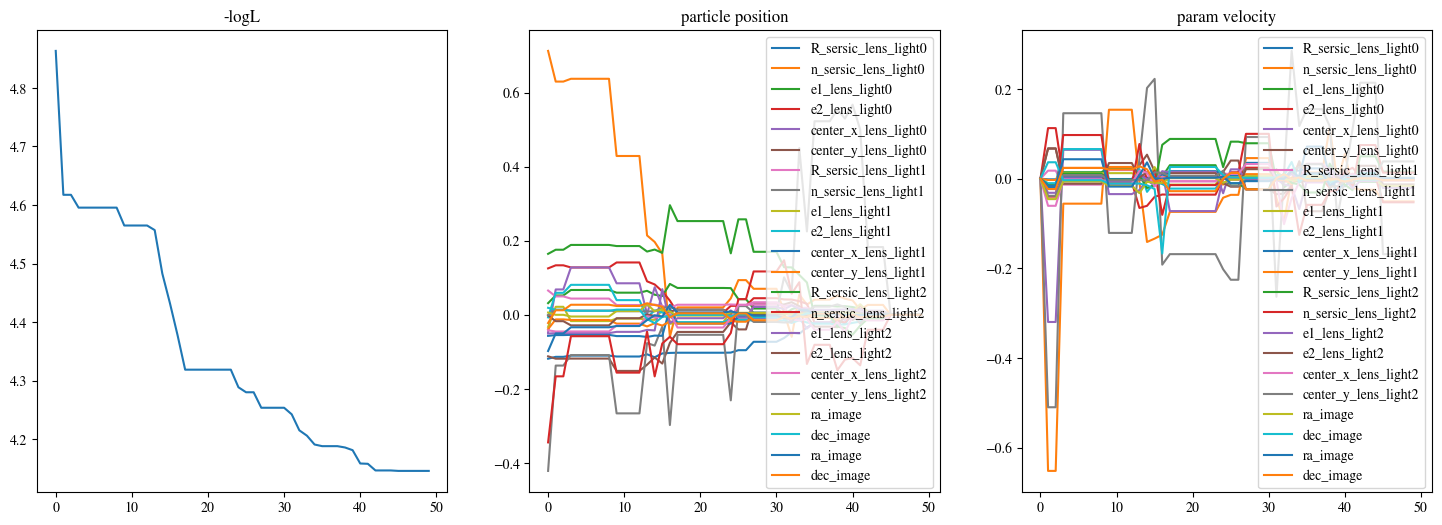

<Figure size 640x480 with 0 Axes>

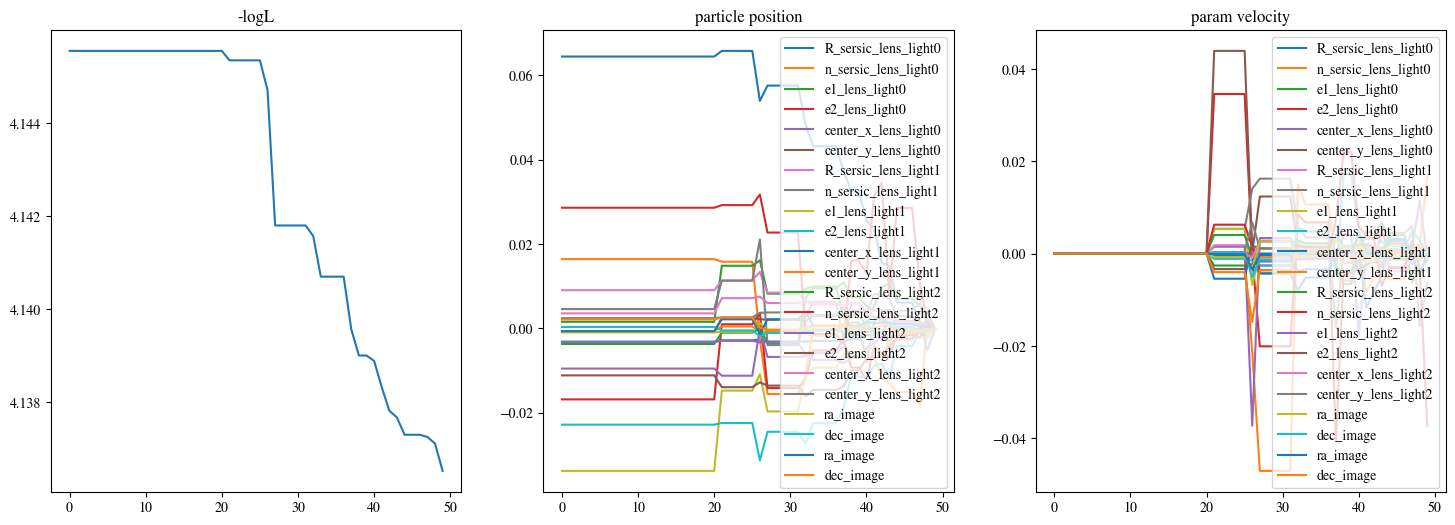

<Figure size 640x480 with 0 Axes>

-3.3778291332805317 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  3.377829133280531


/Users/Dartoon/opt/anaconda3/envs/test_galight/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:67: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/Dartoon/opt/anaconda3/envs/test_galight/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:160: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/Dartoon/opt/anaconda3/envs/test_galight/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:223: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),
/Users/Dartoon/opt/anaconda3/envs/test_galight/lib/python3.10/site-packages/lenstronomy/Plots/model_band_plot.py:1157: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data - model),


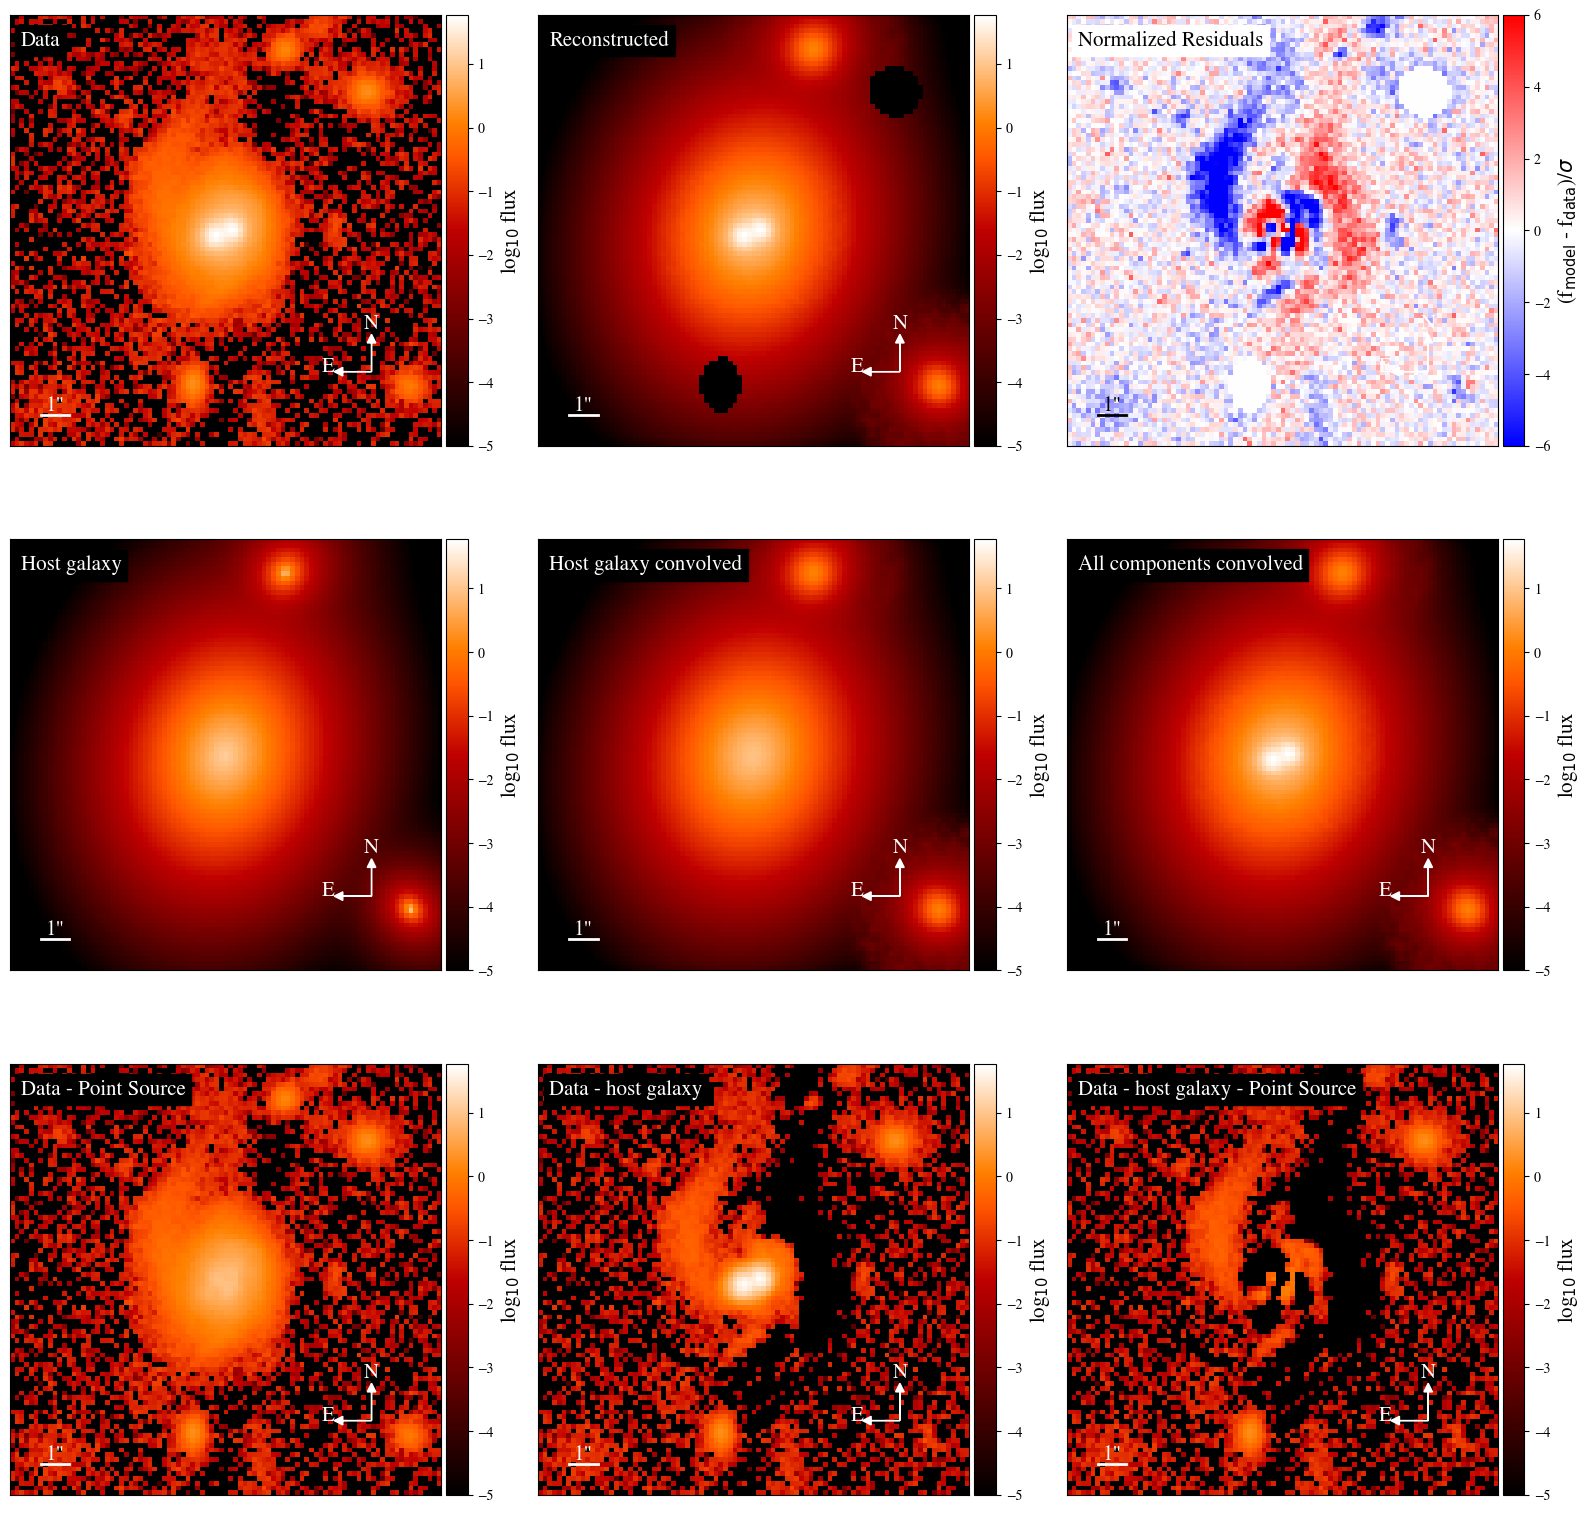

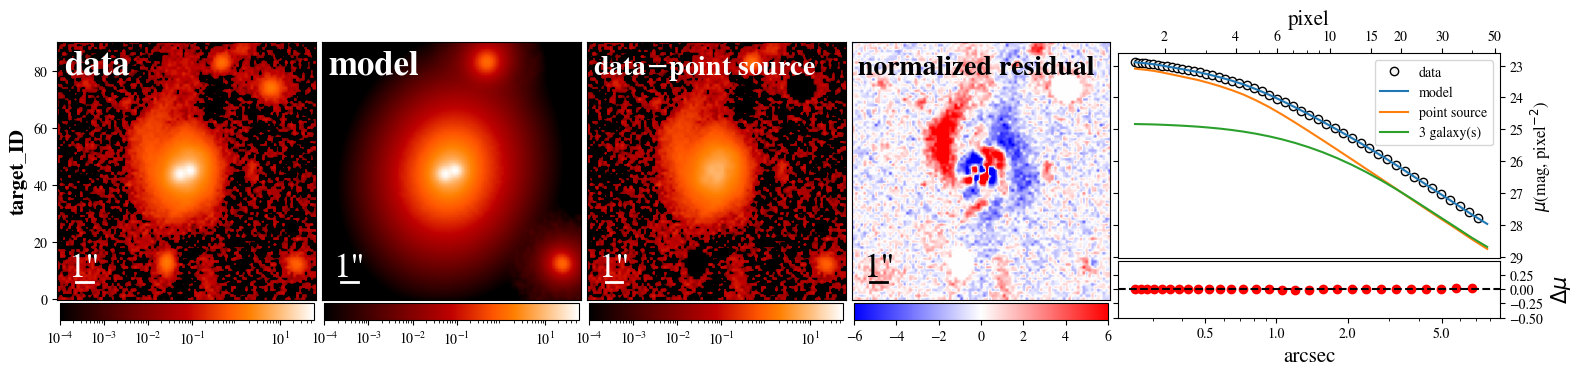

In [4]:
#%%Setting the fitting method and run.
from galight.fitting_process import FittingProcess
fit_run = FittingProcess(fit_sepc, savename = 'HSC_dualAGN')
fit_run.run()
fit_run.plot_all()
fit_run.dump_result()


In [5]:
#Load the saved fitting class, the fitting_run_result would be the loaded as fit_run() in previous fittings.
import pickle
picklename = 'HSC_dualAGN.pkl'
fitting_run_result = pickle.load(open(picklename,'rb'))
#fitting_run_result.plot_final_qso_fit()
fitting_run_result.final_result_galaxy

[{'amp': 103.29332105203444,
  'R_sersic': 1.176211161125793,
  'n_sersic': 0.9441553788629391,
  'e1': -0.09623580510161642,
  'e2': -0.04964848463489787,
  'center_x': 0.034210010916956364,
  'center_y': -0.04713286423676279,
  'phi_G': -1.3326512768868408,
  'q': 0.804585005095297,
  'flux_sersic_model': 1342.450453785491,
  'flux_within_frame': 1341.886150862526,
  'magnitude': 19.180710823214877},
 {'amp': 39.73946817151797,
  'R_sersic': 0.23633126245337338,
  'n_sersic': 2.2528198597926363,
  'e1': -0.016141417166902476,
  'e2': -0.057168711618399363,
  'center_x': -2.095405666038654,
  'center_y': 6.412427893248353,
  'phi_G': -0.9229900605841882,
  'q': 0.8878543495821942,
  'flux_sersic_model': 33.980172324597646,
  'flux_within_frame': 31.063186919683574,
  'magnitude': 23.269384974977143},
 {'amp': 154.23419150707028,
  'R_sersic': 0.09651000459675224,
  'n_sersic': 3.2676156221991826,
  'e1': -0.010344086690735369,
  'e2': 0.0829877475003196,
  'center_x': -6.5341906753418